# Churchland Widefield Data

This notebook demonstrates:
- Defining and projecting onto the choice decoding axis

In [1]:
# Import statements

import numpy as np
import pandas as pd
import ssm
import re
import seaborn as sns
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy.linalg as la
from collections import OrderedDict
from matplotlib.font_manager import FontProperties
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from ssm import LDS
from Session import *
from LVM import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [6]:
task = "vistrained"
taskdir = "/home/chingf/engram/data/musall/" + task + "/"

## 1. Define CD axis over all trials and neurons

In [23]:
def generate_cd(activity, choices):
    """
    Generates a global coding direction for left/right lick choice.
    
    Args
        Activity: (trials x bins x neurons) array
        Choices: (trials)-size array
    Returns
        coding direction vector of size (neurons x bins)
    """
    
    r_activity = []
    l_activity = []
    
    for trial, choice in enumerate(choices):
        if choice == 1:
            l_activity.append(activity[trial,:,:].T)
        else:
            r_activity.append(activity[trial,:,:].T)
    l_activity = np.array(l_activity)
    r_activity = np.array(r_activity)
    r_mean = np.mean(r_activity, axis=0)
    l_mean = np.mean(l_activity, axis=0)
    r_var = np.var(r_mean)
    l_var = np.var(l_mean)
    v = (r_mean - l_mean)/np.sqrt(r_var + l_var)
    cd = v/np.linalg.norm(v, ord=1)
    return cd

In [24]:
# Load session and generate CD
session = Session(task, "mSM30", "10-Oct-2017", access_engram=False, load_behavenet=False)
delay_period_indices = session.get_delay_period(include_stim=True)
all_neural_data = session.neural['neural']
trial_choices = session.trialmarkers['ResponseSide']
cd = generate_cd(all_neural_data, trial_choices)

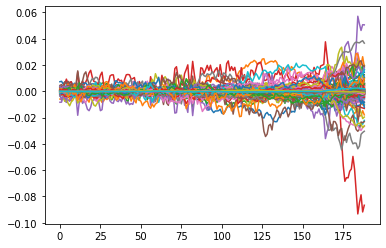

In [28]:
plt.plot(cd.T)
plt.show()